In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\bank-full.csv" ,delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [23]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [24]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [25]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [26]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [27]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [28]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [30]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [31]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
X=df.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','y'],axis=1)
X

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [8]:
Y=df['y'].map({'yes':1,'no':0})
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

### Model Building

In [9]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pre = classifier.predict(X)

In [11]:
y_pred= pd.DataFrame({'actual': Y,
                         'prob':classifier.predict_proba(X)[:,1],
                         'predicted_prob': classifier.predict(X)})

In [12]:
y_pred

,actual,prob,predicted_prob
0,0,0.075197,0
1,0,0.098039,0
2,0,0.130654,0
3,0,0.075924,0
4,0,0.179822,0
...,...,...,...
45206,1,0.300484,0
45207,1,0.038629,0
45208,1,0.221462,0
45209,0,0.055745,0


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pre)
print (confusion_matrix)

[[39275   647]
 [ 4474   815]]


In [14]:
classifier.score(X,Y)

0.8867311052619937

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pre))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.15      0.24      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

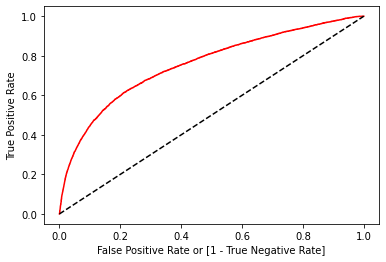

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.3f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [37]:
auc = roc_auc_score(Y, y_pre)
auc

0.5689433992617614